In [41]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date


loading in data 


In [42]:
os.getcwd()


'c:\\Users\\Olivia_Pinney\\Documents\\UChicago_Materials\\Data_Viz\\CAPP30239_FA22\\final\\data'

# Department Roster

In [43]:
history_roster=pd.read_csv("extra_data/roster_1936-2017_2017-04.csv")


In [44]:
df=history_roster 
df["resignation_date"]=df["resignation_date"].fillna("2999-01-01")
df["resignation_year"]=df["resignation_date"].apply(lambda x: int(str(x)[0:4]))

df["appointed_date"]=df["appointed_date"].fillna("1000-01-01")
df["appointed_year"]=df["appointed_date"].apply(lambda x: int(str(x)[0:4]))

df=df[df["appointed_year"]<2017] #officer in 2016
df=df[df["resignation_year"]>2015] #officer in 2016

#check that no one is duplicated
temp=df.UID.value_counts().reset_index()
problem_uids=temp[temp.UID>1]["index"]
print(problem_uids)
print(df.shape)
df=df[~(df["UID"].isin(problem_uids) & ~df["current_status"]>0)]
print(df.shape)


0    131785.0
1    131788.0
2    131787.0
3    131783.0
4    131784.0
5    131789.0
6    131786.0
Name: index, dtype: float64
(13126, 36)
(13119, 36)


In [45]:
max(df.appointed_year)

2016

In [142]:
df["unit_cat"]=np.where(df["unit_description"].isna(),"OTHER",
    np.where(df["unit_description"].str.contains("DISTRICT 0"),"DISTRICT",
    np.where(df["unit_description"].str.contains("TRAINING"),"TRAINING",
    np.where(df["unit_description"].str.contains("DETECTIVE"),"DETECTIVE",
    np.where(df["unit_description"].str.contains("SPECIAL INVESTIGATIONS UNIT"),"DETECTIVE",
    np.where(df["unit_description"].str.contains("TRAFFIC"),"TRANSPORT",
    np.where(df["unit_description"].str.contains("TRANSPORT"),"TRANSPORT",
    np.where(df["unit_description"].str.contains("TRANSIT"),"TRANSPORT",    
    np.where(df["unit_description"].str.contains("AIRPORT"),"TRANSPORT",
    np.where(df["unit_description"].str.contains("GANG"),"GANG ENFORCEMENT",
    "OTHER"
    ))))))))))


# Section of Complaints

In [143]:
complaints=pd.read_csv("extra_data/complaints-accused.csv")
complaints_detailed=pd.read_csv("extra_data/complaints-complaints.csv")
complaint_types=pd.read_csv("extra_data/Complaint Categories.csv")

cmp= complaints.merge(complaints_detailed[["cr_id", "complaint_date"]],on="cr_id",how="left")
cmp["code"]=cmp["complaint_code"]
complaint_types=complaint_types[~pd.isna(complaint_types["111"])]
complaint_types["code"]=complaint_types["111"]
cmp= cmp.merge(complaint_types,on="code",how="left")

C:\Users\Olivia_Pinney\AppData\Local\Temp\ipykernel_22944\3007505927.py:1: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints=pd.read_csv("extra_data/complaints-accused.csv")
C:\Users\Olivia_Pinney\AppData\Local\Temp\ipykernel_22944\3007505927.py:2: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints_detailed=pd.read_csv("extra_data/complaints-complaints.csv")


In [144]:
#complaint results: did not end up using
comp_cat={"NAF":"No Affidavit", "EX":"Complaint Dismissed", "UN":"Complaint Dismissed","NS":"Insufficient Evidence","SU":"Complaint Accepted", "DIS":"Complaint Accepted","NC":"Missing Complaint Type","Missing":"Missing"}

dept_exclude=["OPERATION/PERSONNEL VIOLATION:  MISCELLANEOUS","MISCELLANEOUS", "OPERATION/PERSONNEL VIOLATION:  REPORTS - FAIL TO SUBMIT/IMPROPER", "OPERATION/PERSONNEL VIOLATION:  INVENTORY PROCEDURES","REPORTS - FAILED TO SUBMIT/IMPROPER","INVENTORY PROCEDURES","OPERATION/PERSONNEL VIOLATION: COMMUNICATION OPERATION PROCEDURES","COMMUNICATION OPERATIONS PROCEDURES","OPERATION/PERSONNEL VIOLATION:  VEHICLE LICENSING - CITY","MISUSE OF DEPARTMENT EQUIPMENT/SUPPLIES","INSUBORDINATION","OPERATION/PERSONNEL VIOLATION:  INSUBORDINATION","MEDICAL ROLL","OPERATION/PERSONNEL VIOLATION:  MEDICAL ROLL","OPERATION/PERSONNEL VIOLATION:  WEAPON/AMMUN./UNIFORM DEVIATION","FAIL TO OBTAIN A COMPLAINT REGISTER NUMBER","OPERATION/PERSONNEL VIOLATION: MISUSE OF DEPT. EQUIPMENT/SUPPLIES","OPERATION/PERSONNEL VIOLATION:  ABSENT WITHOUT PERMISSION","WEAPON/AMMUNITION/UNIFORM DEVIATION","SUPERVISOR RESPONSIBILITY:  FAIL TO OBTAIN COMPLAINT REGISTER NO.","SUPERVISOR RESPONSIBILITY:  MISCELLANEOUS","OPERATION/PERSONNEL VIOLATION:  LEAVING ASGMT (DIST/BEAT/SECT/CT)","ABSENT WITHOUT PERMISSION","OPERATION/PERSONNEL VIOLATION:  RESIDENCY","LEAVING ASSIGNMENT (DISTRICT, BEAT, SECTOR, COURT)","RESIDENCY","OPERATION/PERSONNEL VIOLATION:  COMPENSATORY TIME","VEHICLE LICENSING - CITY","OPERATION/PERSONNEL VIOLATION:  LATE FOR ROLL CALL/ASSIGNMENT/CT.","COMPENSATORY TIME","SUPVR. RESPONSIBILITY:  PROPER ACTION REVIEW/INSPECT- SUBORDINATE","OPERATION/PERSONNEL VIOLATION:  LUNCH/PERSONAL","LATE - ROLL CALL/ASSIGNMENT/COURT","LUNCH/PERSONAL VIOLATIONS","PROPER ACTION REVIEW/INSPECT - SUBORDINATE","EQUIPMENT IRREGULARITY"]

force=["EXCESSIVE FORCE","STRIKE","ASSAULT","BATTERY","PUSH","PULL","GRAB","CHOKED","KICKED","DRAGGED","TASER","SHOTS FIRED","COERCION - VIOLENCE","MURDER","MANSLAUGHTER","TAKE DOWN","INJURY","DEATH","FIREARM","WEAPON","PHYSICAL CONTACT"]
detain=["DETENTION","WARRANT","SEARCH","ARRESTEE","ARREST","LOCKUP","BONDING","BOOKING","PROCESSING","PRISONER'S PROPERTY", "PRISONERS PROPERTY"]
hate=["RACIAL","SEXUAL ORIENTATION","VERBAL ABUSE", "USE OF PROFANITY", "THREATS"]
crime=["COMMISSION OF CRIME", "DAMAGE","TRESPASSING", "BURGLARY", "THEFT", "FELONY","DRUGS","CONTR. SUB", "ROBBERY", "SHOPLIFTING","DOMESTIC","RAPE"]


In [145]:
cmp["civ_complaint_force"]=False
cmp["civ_complaint_detain"]=False
cmp["civ_complaint_hate"]=False
cmp["civ_complaint_crime"]=False

cmp["civ_complaint_count"]=np.where(cmp["CITIZEN / DEPT"]=="CITIZEN",1,0)
cmp["civ_complaint_count_desc"]=np.where(cmp["civ_complaint_count"],cmp.complaint_category,"")
cmp["civ_complaint_count_desc"]=np.where(cmp["civ_complaint_count_desc"].isna(),"Missing",cmp["civ_complaint_count_desc"])

for word in force:
    cmp["civ_complaint_force"]=np.where(cmp["civ_complaint_count_desc"].str.contains(word,case=False),True,cmp["civ_complaint_force"])
for word in detain:
    cmp["civ_complaint_detain"]=np.where(cmp["civ_complaint_count_desc"].str.contains(word,case=False),True,cmp["civ_complaint_detain"])
for word in hate:
    cmp["civ_complaint_hate"]=np.where(cmp["civ_complaint_count_desc"].str.contains(word,case=False),True,cmp["civ_complaint_hate"])
for word in crime:
    cmp["civ_complaint_crime"]=np.where(cmp["civ_complaint_count_desc"].str.contains(word,case=False),True,cmp["civ_complaint_crime"])

duplicate_words_detain=["EXCESSIVE FORCE:  ARRESTEE","EXCESSIVE FORCE:  NO ARREST"]
duplicate_words_force=["COMMISSION OF CRIME:  ASSAULT/BATTERY","COMMISSION OF CRIME:  MURDER/MANSLAUGHTER ETC","ARREST/LOCKUP PROCEDURE:  PROPER CARE/INJURY/DEATH"]
duplicate_words_crime=["EXCESSIVE FORCE:  DOMESTIC"]

#this is code to identify duplicate words 
#cmp[["civ_complaint_count","civ_complaint_force","civ_complaint_detain","civ_complaint_hate","civ_complaint_crime"]].value_counts()
#cmp.loc[(cmp["civ_complaint_force"]==True) & (cmp["civ_complaint_detain"]==True)]["civ_complaint_count_desc"].value_counts()

for word in duplicate_words_force:
    cmp["civ_complaint_force"]=np.where(cmp["civ_complaint_count_desc"].str.contains(word,case=False),False,cmp["civ_complaint_force"])
for word in duplicate_words_detain:
    cmp["civ_complaint_detain"]=np.where(cmp["civ_complaint_count_desc"].str.contains(word,case=False),False,cmp["civ_complaint_detain"])
for word in duplicate_words_crime:
    cmp["civ_complaint_crime"]=np.where(cmp["civ_complaint_count_desc"].str.contains(word,case=False),False,cmp["civ_complaint_crime"])


In [146]:
cmp["comp_cat"]=np.where(cmp.final_finding.isna(),"Missing",cmp.final_finding)
cmp["comp_cat"]=cmp["comp_cat"].replace(comp_cat)

cmp["dept_complaint_count"]=np.where(cmp["CITIZEN / DEPT"]=="DEPT",True,False)
cmp["dept_complaint_cleaned_count"]=np.where(cmp["CITIZEN / DEPT"]=="DEPT",np.where(cmp.complaint_category.isin(dept_exclude),False,True),False)
cmp["dept_complaint_cleaned_count_desc"]=np.where(cmp["dept_complaint_cleaned_count"],cmp.complaint_category,"")

cmp["civ_complaint_cat"]=np.where(cmp.civ_complaint_force,"FORCE",
    np.where(cmp.civ_complaint_detain,"DETAIN",
    np.where(cmp.civ_complaint_hate,"HATE",
    np.where(cmp.civ_complaint_crime,"CRIME",
    np.where(cmp.civ_complaint_count,"OTHER","")))))
    
#checking count made correctly
#cmp[cmp.dept_complaint_count==1][["complaint_category","dept_complaint_cleaned_count"]].value_counts()

## This is where I can redo to get value counts

In [147]:
cmp_counts=cmp.groupby("UID",as_index=False).agg({"dept_complaint_count":"sum","dept_complaint_cleaned_count":"sum","civ_complaint_count":"sum","civ_complaint_force":"sum","civ_complaint_detain":"sum","civ_complaint_hate":"sum","civ_complaint_crime":"sum"})
df=df.merge(cmp_counts,on="UID",how="left")

counts=["dept_complaint_cleaned_count","civ_complaint_count","civ_complaint_force","civ_complaint_detain","civ_complaint_hate","civ_complaint_crime"]
col_names=["dept_complaint_cleaned_count_desc","civ_complaint_count_desc","civ_complaint_force_desc","civ_complaint_detain_desc","civ_complaint_hate_desc","civ_complaint_crime_desc"]
for i, count in enumerate(counts):
    temp=cmp[cmp[count]==True].groupby("UID")["complaint_category"].apply(list).reset_index()
    temp.columns=["UID",col_names[i]]
    df=df.merge(temp,on="UID",how="left")


## TTR

In [148]:
trr_overall=pd.read_csv("extra_data/TRR-main_2004-2016_2016-09.csv")
trr_subjects=pd.read_csv("extra_data/TRR-subjects_2004-2016_2016-09.csv")
trr_officers=pd.read_csv("extra_data/TRR-officers_2004-2016_2016-09.csv")
trr_actions=pd.read_csv("extra_data/TRR-actions-responses_2004-2016_2016-09.csv")

trr=trr_overall.merge(trr_officers,on="trr_id",suffixes=("","_officer")) #,how="left"
trr=trr.merge(trr_subjects,on="trr_id",suffixes=("","_subject")) #,how="left"
trr=trr.merge(trr_actions[trr_actions.person=="Member Action"],on="trr_id",suffixes=("","_subject"))

trr["trr_year"]=trr["trr_date"].apply(lambda x: int(str(x)[0:4]))


In [149]:
action_cat={"Missing":"Missing","Verbal Commands":"Other","Member Presence":"Other","Physical Force - Stunning":"Use of Force","Physical Force - Holding":"Use of Force","Physical Force - Direct Mechanical":"Use of Force","Other Force":"Use of Force","Taser":"Use of Weapon","Chemical":"Use of Weapon","Impact Weapon":"Use of Weapon","Firearm":"Use of Weapon","Taser Display":"Other","Chemical (Authorized)":"Use of Weapon","Other":"Other"} 

In [150]:
trr["force_cat"]=np.where(trr.force_type.isna(),"Missing",trr.force_type.replace(action_cat))
trr["count"]=True
trr["weapon_count"]=np.where(trr["force_cat"]=="Use of Weapon",True,False)
trr["force_count"]=np.where(trr["force_cat"]=="Use of Force",True,trr["weapon_count"])
trr["trr_count"]=np.where(trr["force_cat"]=="Other",True,trr["force_count"])



## Also can update TRR here to get better lists

In [151]:
trr_counts=trr.groupby("UID",as_index=False).agg({"force_count":"sum","weapon_count":"sum","trr_count":"sum"})
    
df=df.merge(trr_counts,on="UID",how="left")

counts=["force_count","weapon_count","trr_count"]
col_names=["force_count_desc","weapon_count_desc","trr_count_desc"]
for i, count in enumerate(counts):
    temp=trr[trr[count]==True].groupby("UID")["action"].apply(list).reset_index()
    temp.columns=["UID",col_names[i]]
    df=df.merge(temp,on="UID",how="left")


# Export

In [152]:
col_names=["force_count","weapon_count","trr_count","dept_complaint_count","dept_complaint_cleaned_count","civ_complaint_count","civ_complaint_force","civ_complaint_detain","civ_complaint_hate","civ_complaint_crime"]

for col in col_names:
    df[col+"_persons_with"]=np.where(df[col]>0,1,0)

In [153]:
df["one"]=1
unit_all=df.groupby("unit_description").agg({"UID":"count","force_count":"sum","weapon_count":"sum","trr_count":"sum","dept_complaint_count":"sum","dept_complaint_cleaned_count":"sum","civ_complaint_count":"sum","civ_complaint_force":"sum","civ_complaint_detain":"sum","civ_complaint_hate":"sum","civ_complaint_crime":"sum","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()
unit_cats=df.groupby("unit_cat").agg({"UID":"count","force_count":"sum","weapon_count":"sum","trr_count":"sum","dept_complaint_count":"sum","dept_complaint_cleaned_count":"sum","civ_complaint_count":"sum","civ_complaint_force":"sum","civ_complaint_detain":"sum","civ_complaint_hate":"sum","civ_complaint_crime":"sum","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()
#unit_total=df.groupby("one").agg({"UID":"count","force_count":"sum","weapon_count":"sum","trr_count":"sum","dept_complaint_count":"sum","dept_complaint_cleaned_count":"sum","civ_complaint_count":"sum","civ_complaint_force":"sum","civ_complaint_detain":"sum","civ_complaint_hate":"sum","civ_complaint_crime":"sum","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()
unit_total=df[df.unit_description!="RECRUIT TRAINING SECTION"].groupby("one").agg({"UID":"count","force_count":"sum","weapon_count":"sum","force_count_persons_with":"sum","weapon_count_persons_with":"sum"}).reset_index()

for col in col_names:
    unit_all[col+"_persons_with_p"]=unit_all[col+"_persons_with"]/unit_all["UID"]
    unit_cats[col+"_persons_with_p"]=unit_cats[col+"_persons_with"]/unit_cats["UID"]

unit_all.to_json("departments.json",orient="records")
unit_cats.to_json("departments_cats.json",orient="records")
unit_total.to_json("total_force.json",orient="records")


Need to fix this years in 2016. why am i getting negative?

In [154]:
df['appointed_year']=df['appointed_date'].apply(lambda x: str(x)[0:4])
df['appointed_year']=df['appointed_year'].astype("int") 

df["years_in_2016"]=2017-df['appointed_year'].astype(int)
df["years_in_2016"]=np.where(df["years_in_2016"]==1017,-1,df["years_in_2016"])
# df['force_count_per_year']=df['force_count']/df["years_in_2016"]
# df['dept_complaint_cleaned_per_year']=df['dept_complaint_cleaned_count']/df["years_in_2016"]
# df['civ_complaint_per_year']=df['civ_complaint_count']/df["years_in_2016"]

df["full_name"]=df['first_name']+" "
df["full_name"]=np.where(df["middle_initial"].isna(),df["full_name"],df["full_name"]+df['middle_initial']+". ")
df["full_name"]=np.where(df["middle_initial2"].isna(),df["full_name"],df["full_name"]+df['middle_initial2']+". ")
df["full_name"]=df["full_name"]+df['last_name']
df["full_name"]=np.where(df["suffix_name"].isna(),df["full_name"],df["full_name"]+" "+df['suffix_name'])



In [155]:
# df['dept_complaint_cleaned_per_year']

In [156]:
cols_to_keep=['gender', 'race', 'birth_year', 'current_age','appointed_date', 'current_rank', 'unit_description', 'first_name', 'last_name', 'middle_initial', 'suffix_name','UID','dept_complaint_cleaned_count', 'civ_complaint_count','civ_complaint_force', 'civ_complaint_detain', 'civ_complaint_hate','civ_complaint_crime', 'dept_complaint_desc', 'civ_complaint_desc','civ_complaint_force_desc', 'civ_complaint_detain_desc','civ_complaint_hate_desc', 'civ_complaint_crime_desc', 'force_count','weapon_count','trr_count', 'action_force_desc', 'action_weapon_desc']
cols_to_keep=['full_name','last_name','birth_year','appointed_date', 'current_rank', 'unit_description','dept_complaint_cleaned_count', 'civ_complaint_count','civ_complaint_force', 'civ_complaint_detain', 'civ_complaint_hate','civ_complaint_crime', 'dept_complaint_cleaned_count_desc', 'civ_complaint_count_desc','civ_complaint_force_desc', 'civ_complaint_detain_desc','civ_complaint_hate_desc', 'civ_complaint_crime_desc', 'force_count','weapon_count','trr_count', 'force_count_desc', 'weapon_count_desc','years_in_2016']

cols_to_keep_int=['dept_complaint_cleaned_count', 'civ_complaint_count','civ_complaint_force', 'civ_complaint_detain', 'civ_complaint_hate','civ_complaint_crime', 'force_count','weapon_count','trr_count','years_in_2016']
cols_to_keep_str=['full_name','last_name','birth_year','appointed_date', 'current_rank', 'unit_description']
cols_to_keep_list=['dept_complaint_cleaned_count_desc', 'civ_complaint_count_desc','civ_complaint_force_desc', 'civ_complaint_detain_desc','civ_complaint_hate_desc', 'civ_complaint_crime_desc', 'action_force_desc', 'action_weapon_desc']

for col in cols_to_keep_int:
    df[col]=np.where(df[col].isna(),0,df[col])
for col in cols_to_keep_str:
    df[col]=np.where(df[col].isna(),"",df[col])
# for col in cols_to_keep_list:
#     df[col]=np.where(df[col].isna(),list(),df[col])


df[cols_to_keep].to_json("officers_2016.json",orient="records")


# Update Department Json

In [157]:
import json

with open("departments.json") as file:
    data = json.load(file)

with open("officers_2016.json") as file:
    officers = json.load(file)

for d in data:
    d["officers"]=[]
    temp=[]
    for officer in officers:
        if officer["unit_description"]==d["unit_description"]:
            d["officers"].append(officer)

with open("departments_officers.json", "w") as outfile:
    json.dump(data, outfile)


# Make JSON with Colors

## edits:
need to add district names
fix other order
fix text wrap


In [158]:
districts=pd.read_csv("extra_data/Districts.csv")

In [159]:
districts["District_No_str"]=districts["District_No"].astype(str)
districts["District_Id"]=np.where(districts["District_No"]>9,"DISTRICT 0"+districts["District_No_str"],"DISTRICT 00"+districts["District_No_str"])
districts["District_Title"]=np.where(districts["District_No"]>9,"0"+districts["District_No_str"]+": "+districts["District_Name"],"00"+districts["District_No_str"]+": "+districts["District_Name"])

# districts.set_index("District_Id")
districts.head()


,District_No,District_Name,Population,Latino,White,Black,Native_American,Asian,Other,Latino%,White%,Black%,Native_American%,Asian%,Other%,Majority,District_No_str,District_Id,District_Title
0,1,Central,"62,781","3,766","32,952","13,452",95,"10,790","1,726",6%,52%,21%,0%,17%,3%,White,1,DISTRICT 001,001: Central
1,2,Wentworth,"95,439","3,242","17,747","65,993",138,"5,837","2,482",3%,19%,69%,0%,6%,3%,Black,2,DISTRICT 002,002: Wentworth
2,3,Grand Crossing,"75,235","1,123","1,472","71,010",169,312,"1,149",1%,2%,94%,0%,0%,2%,Black,3,DISTRICT 003,003: Grand Crossing
3,4,South Chicago,"123,575","35,381","9,925","76,399",223,258,"1,389",29%,8%,62%,0%,0%,1%,Black,4,DISTRICT 004,004: South Chicago
4,5,Calumet,"74,396","2,524",843,"70,064",118,38,809,3%,1%,94%,0%,0%,1%,Black,5,DISTRICT 005,005: Calumet


In [160]:
#replicating the groups 
tree=df[["unit_cat","unit_description"]].value_counts().reset_index()
tree.columns=["unit_cat","unit_description","count"]
tree2=df[["unit_cat"]].value_counts().reset_index()
tree2.columns=["unit_cat","count"]

colors=["#a63603","#e6550d","#fd8d3c","#fdae6b","#fdd0a2","#feedde","#D3D3D3"]
cats=df["unit_cat"].unique()

tree_dict={}
tree_dict["name"]="FULL ROSTER"
tree_dict["children"]=[]

for color_index, cat in enumerate(["DISTRICT","DETECTIVE","TRAINING","TRANSPORT","GANG ENFORCEMENT","OTHER"]):
    child={}
    child["name"]=cat
    #child['value']=int(tree2.iloc[color_index,1])
    child["color"]=colors[color_index]
    child["children"]=[]
    
    other_grandchild={}
    other_grandchild["name"]="OTHER"
    other_grandchild["color"]=colors[color_index]
    other_grandchild["children"]=[]

    hold=tree[tree.unit_cat==cat]
    for index in range(hold.shape[0]):
        grandchild={}
        if hold.iloc[index,1]=="":
            grandchild["name"]=hold.iloc[index,1]="UNKNOWN: LIKELY UNDERCOVER"
        if cat=="DISTRICT":
            hold2=districts[districts["District_Id"]==hold.iloc[index,1]]
            if hold2.shape[0]>0:                
                print(hold2["District_Title"])
                grandchild["name"]=hold2.iloc[0]["District_Title"]
            else:
                grandchild["name"]=hold.iloc[index,1]
        else:
            grandchild["name"]=hold.iloc[index,1]

        grandchild["value"]=int(hold.iloc[index,2])
        grandchild["percent_value"]=hold.iloc[index,2]/hold["count"].sum()
        grandchild["color"]=colors[color_index]
        
        if grandchild["percent_value"]<0.02:
            other_grandchild["children"].append(grandchild)
        else:
            child["children"].append(grandchild)

    if len(other_grandchild["children"])==0:
        pass
    elif len(other_grandchild["children"])==1:
        child["children"].append(other_grandchild["children"][0])
    else:
        child["children"].append(other_grandchild)
    tree_dict["children"].append(child)
with open("departments_tree.json", "w") as outfile:
    json.dump(tree_dict,outfile)



6    007: Englewood
Name: District_Title, dtype: object
10    011: Harrison
Name: District_Title, dtype: object
7    008: Chicago Lawn
Name: District_Title, dtype: object
2    003: Grand Crossing
Name: District_Title, dtype: object
17    019: Town Hall
Name: District_Title, dtype: object
5    006: Gresham
Name: District_Title, dtype: object
1    002: Wentworth
Name: District_Title, dtype: object
9    010: Ogden
Name: District_Title, dtype: object
4    005: Calumet
Name: District_Title, dtype: object
11    012: Near West
Name: District_Title, dtype: object
13    015: Austin
Name: District_Title, dtype: object
3    004: South Chicago
Name: District_Title, dtype: object
8    009: Deering
Name: District_Title, dtype: object
21    025: Grand Central
Name: District_Title, dtype: object
16    018: Near North
Name: District_Title, dtype: object
0    001: Central
Name: District_Title, dtype: object
19    022: Morgan Park
Name: District_Title, dtype: object
14    016: Jefferson Park
Name: Distri

# Make JSON for pie charts

In [161]:
#//want json with issue, then list of values, with cat (str) and totals (int)
df.columns


temp=df[df.unit_description!="RECRUIT TRAINING SECTION"].groupby("one").agg({"UID":"count","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()
temp2=df[df.unit_description!="RECRUIT TRAINING SECTION"].groupby("unit_cat").agg({"UID":"count","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()
temp3=df.groupby("unit_description").agg({"UID":"count","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()

# for col in temp.columns[2:]:
#     temp[col]=temp[col]/temp["UID"]
#     temp2[col]=temp2[col]/temp2["UID"]
#     temp3[col]=temp3[col]/temp3["UID"]

# temp.to_json("percent_all.json",orient="records")
# temp2.to_json("percent_cat.json",orient="records")
# temp3.to_json("percent_dept.json",orient="records")



In [162]:
temp

,one,UID,force_count_persons_with,weapon_count_persons_with,trr_count_persons_with,dept_complaint_count_persons_with,dept_complaint_cleaned_count_persons_with,civ_complaint_count_persons_with,civ_complaint_force_persons_with,civ_complaint_detain_persons_with,civ_complaint_hate_persons_with,civ_complaint_crime_persons_with
0,1,11700,8553,3534,8657,9507,8377,9967,5998,8747,3527,2409


In [163]:
complaint_desc={"dept_complaint_cleaned_count_persons_with":"Severe Departmental Complaint","civ_complaint_count_persons_with":"Any Civilian Complaint","civ_complaint_force_persons_with":"Use of Force / Weapon","civ_complaint_detain_persons_with":"Handling of Arrest / Detainment","civ_complaint_hate_persons_with":"Bigotry / Verbal Abuse","civ_complaint_crime_persons_with":"Criminal Activity"}
cats=df["unit_cat"].unique()

temp1=df[df.unit_description!="RECRUIT TRAINING SECTION"].groupby("one").agg({"UID":"count","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()
temp2=df[df.unit_description!="RECRUIT TRAINING SECTION"].groupby("unit_cat").agg({"UID":"count","force_count_persons_with":"sum","weapon_count_persons_with":"sum","trr_count_persons_with":"sum","dept_complaint_count_persons_with":"sum","dept_complaint_cleaned_count_persons_with":"sum","civ_complaint_count_persons_with":"sum","civ_complaint_force_persons_with":"sum","civ_complaint_detain_persons_with":"sum","civ_complaint_hate_persons_with":"sum","civ_complaint_crime_persons_with":"sum"}).reset_index()

#for all categories
pie_dict={}
pies=[]
temp=temp1
for col in complaint_desc.keys():
    pie={}
    pie["name"]=complaint_desc[col]
    pie["denom"]=int(temp["UID"][0])
    yes={"Answer":"Yes","Totals":int(temp[col][0]),"Color":0}
    no={"Answer":"No","Totals":pie["denom"]-int(temp[col][0]),"Color":1}
    pie["Values"]=[yes,no]
    pies.append(pie)
pie_dict["ALL"]=pies

# #for specific categories
# for cat in cats:
#     pies=[]
#     temp=temp2[temp2.unit_cat==cat]
#     print()
#     for col in complaint_desc.keys():
#         pie={}
#         pie["name"]=complaint_desc[col]
#         pie["denom"]=int(temp.iloc[0]["UID"])
#         yes={"Answer":"Yes","Totals":int(temp.iloc[0][col])}
#         no={"Answer":"No","Totals":pie["denom"]-int(temp.iloc[0][col])}
#         pie["Values"]=[yes,no]
#         pies.append(pie)
#     pie_dict[cat]=pies

with open("percent_cat.json", "w") as outfile:
    json.dump(pie_dict,outfile)


In [164]:

# cmp["civ_complaint_cat"].value_counts()
# cmp.head()

#cmp[cmp["civ_complaint_cat"]=="FORCE"][["civ_complaint_cat","civ_complaint_count_desc"]].value_counts()
#cmp[cmp["civ_complaint_cat"]=="DETAIN"][["civ_complaint_cat","civ_complaint_count_desc"]].value_counts()
#cmp[cmp["civ_complaint_cat"]=="HATE"][["civ_complaint_cat","civ_complaint_count_desc"]].value_counts()
cmp[cmp["civ_complaint_cat"]=="CRIME"][["civ_complaint_cat","civ_complaint_count_desc"]].value_counts()
#cmp["dept_complaint_cleaned_count_desc"].value_counts()

# "complaint_category"
# "civ_complaint_cat"
# "dept_complaint_cleaned_count_desc"

civ_complaint_cat  civ_complaint_count_desc                          
CRIME              DOMESTIC ALTERCATION/INCIDENT - OFF DUTY              2240
                   COMMISSION OF CRIME:  MISCELLANEOUS                   1855
                   COMMISSION OF CRIME:  THEFT                           1425
                   DAMAGE/TRESPASSING PROPERTY                            655
                   COMMISSION OF CRIME:  DAMAGE/TRESPASSING PROPERTY      508
                   COMMISSION OF CRIME:DRUGS/CONTR.SUB. POSS. OR SALE     469
                   THEFT                                                  350
                   COMMISSION OF CRIME:  SEX OFFENSES                     174
                   DOMESTIC                                               110
                   COMMISSION OF CRIME:  OTHER FELONY                      97
                   RAPE/SEX OFFENSES                                       95
                   COMMISSION OF CRIME:  ASSAULT/BATTERY ETC..          

## playing around with data

In [165]:
#trr_17["force_count"]=np.where(trr_17["force_cat"]=="Use of Force
col_list=['action', 'other_description','member_action','force_type', 'action_sub_category', 'action_category']

print(trr_17[trr_17["force_cat"]=="Use of Force"].action.value_counts())
print("weapon****************")
print(trr_17[trr_17["force_cat"]=="Use of Weapon"].action.value_counts())
print("weapon****************")
print(trr_17[trr_17["force_cat"]=="Use of Weapon"].other_description.value_counts())


NameError: name 'trr_17' is not defined

In [ ]:
complaints.head()

Index(['unit_cat', 'UID', 'force_count_persons_with',
       'weapon_count_persons_with', 'trr_count_persons_with',
       'dept_complaint_count_persons_with',
       'dept_complaint_cleaned_count_persons_with',
       'civ_complaint_count_persons_with', 'civ_complaint_force_persons_with',
       'civ_complaint_detain_persons_with', 'civ_complaint_hate_persons_with',
       'civ_complaint_crime_persons_with'],
      dtype='object')

In [ ]:
pie_dict

{'ALL': [{'name': 'Severe Departmental Complaint',
   'denom': 11700,
   'Values': [{'Answer': 'Yes', 'Totals': 8377, 'Color': 0},
    {'Answer': 'No', 'Totals': 3323, 'Color': 1}]},
  {'name': 'Any Civilian Complaint',
   'denom': 11700,
   'Values': [{'Answer': 'Yes', 'Totals': 9967, 'Color': 0},
    {'Answer': 'No', 'Totals': 1733, 'Color': 1}]},
  {'name': 'Use of Force / Weapon',
   'denom': 11700,
   'Values': [{'Answer': 'Yes', 'Totals': 5998, 'Color': 0},
    {'Answer': 'No', 'Totals': 5702, 'Color': 1}]},
  {'name': 'Handling of Arrest / Detainment',
   'denom': 11700,
   'Values': [{'Answer': 'Yes', 'Totals': 8747, 'Color': 0},
    {'Answer': 'No', 'Totals': 2953, 'Color': 1}]},
  {'name': 'Bigotry / Verbal Abuse',
   'denom': 11700,
   'Values': [{'Answer': 'Yes', 'Totals': 3527, 'Color': 0},
    {'Answer': 'No', 'Totals': 8173, 'Color': 1}]},
  {'name': 'Criminal Activity',
   'denom': 11700,
   'Values': [{'Answer': 'Yes', 'Totals': 2409, 'Color': 0},
    {'Answer': 'No', 

# Visualizing the data

In [ ]:
df.columns
#unit_all.columns
#unit_cats.columns

Index(['row_id', 'gender', 'race', 'birth_year', 'current_age',
       'current_status', 'appointed_date', 'rank_no', 'current_rank',
       'current_unit', 'unit_description', 'resignation_date', 'star1',
       'star2', 'star3', 'star4', 'star5', 'star6', 'star7', 'star8', 'star9',
       'star10', 'first_name', 'first_name_NS', 'last_name', 'last_name_NS',
       'middle_initial', 'middle_initial2', 'suffix_name', 'merge',
       'roster_1936-2017_2017-04_ID', 'UID', 'old_UID', 'link_UID',
       'resignation_year', 'appointed_year', 'unit_cat',
       'dept_complaint_count', 'dept_complaint_cleaned_count',
       'civ_complaint_count', 'civ_complaint_force', 'civ_complaint_detain',
       'civ_complaint_hate', 'civ_complaint_crime',
       'dept_complaint_cleaned_count_desc', 'civ_complaint_count_desc',
       'civ_complaint_force_desc', 'civ_complaint_detain_desc',
       'civ_complaint_hate_desc', 'civ_complaint_crime_desc', 'force_count',
       'weapon_count', 'trr_count', 'for

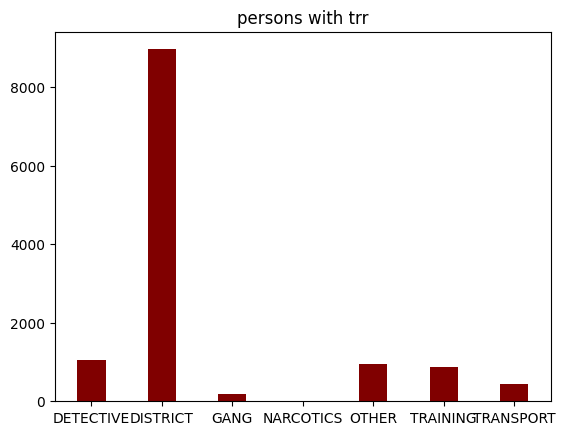

In [ ]:
#unit_cats.trr_count_persons_with_p = unit_cats.trr_count_persons_with/unit_cats.UID

plt.bar(unit_cats.unit_cat, unit_cats.UID, color ='maroon',
        width = 0.4)
plt.title("persons with trr")
plt.show()

Who are police officers?  They fall into categories: most are district. 
Chart 1: tree area
These categories can be broken down. Into the following.
Chart 2: tree area

These police officers are people, but they are people who have been given permission to use force by the state. 
Chart 3: square chart: N officers use force vs N officers not, instances (e.g. people) used force on
- would be super cool is its a set of dots, and around them is a box with which subsection
Chart 4: repeat for weapons. 
summary: Lets talk about the reality of police officers. Not everyone has used a weapon, but in total police use weapons a lot. 1/3rd of police officers have used their weapon. 4/5th have used force.. E.g. gang is small but use weapon and physcial force. Other, traffic, and detective use less violence: but they still do. This is state condoned violence. 
 
*There are individual stories behind each instance of violence: both against the police and at the hands of the police, which these numbers cannot capture. These stories must be told in full.* 

These numbers do not capture the falability of the police. They abuse their powers. They arrest and detain people illegally. They sell controlled substances and commit rape. They do irreperable harm when they kill civilians. Some of these instances are reported in civilian and departmental complaints. 

Chart 5: pie percentages. 

Read the stories.
 
Chart 6: Stories on the left


In [ ]:
# trr_17[["force_type"]].value_counts()

# Physical Force - Holding              57648
# Physical Force - Direct Mechanical    10892
# Other Force                            9097

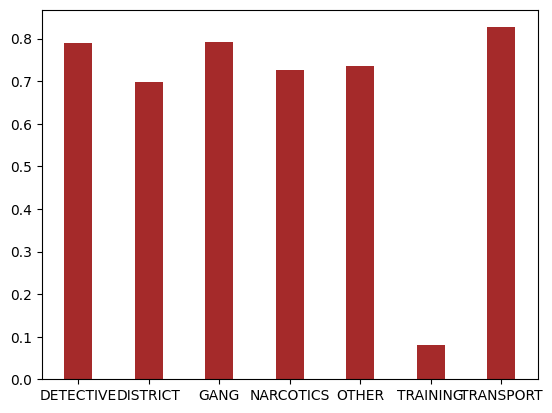

In [ ]:
#plt.bar(unit_cats.unit_cat, unit_cats.civ_complaint_crime_persons_with_p, color ='maroon',width = 0.4)
#plt.bar(unit_cats.unit_cat, unit_cats.civ_complaint_force_persons_with_p, color ='purple',width = 0.4)
#plt.bar(unit_cats.unit_cat, unit_cats.civ_complaint_detain_persons_with_p, color ='brown',width = 0.4)
plt.bar(unit_cats.unit_cat, unit_cats.civ_complaint_hate_persons_with_p, color ='brown',width = 0.4)
plt.bar(unit_cats.unit_cat, unit_cats.dept_complaint_cleaned_count_persons_with_p, color ='brown',width = 0.4)

#plt.bar(unit_cats.unit_cat, unit_cats.weapon_count_persons_with_p, color ='maroon',width = 0.4)
plt.show()

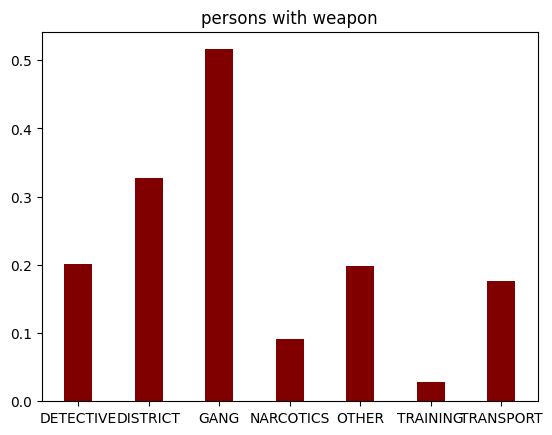

In [ ]:
plt.bar(unit_cats.unit_cat, unit_cats.weapon_count_persons_with_p, color ='maroon',
        width = 0.4)
plt.title("persons with weapon")
plt.show()

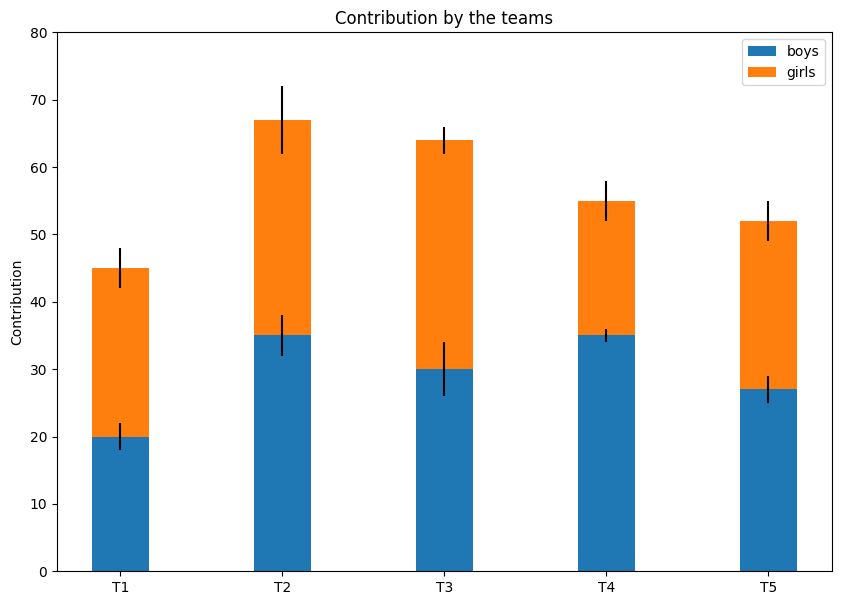

In [ ]:
N = 5
 
boys = (20, 35, 30, 35, 27)
girls = (25, 32, 34, 20, 25)
boyStd = (2, 3, 4, 1, 2)
girlStd = (3, 5, 2, 3, 3)
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, boys, width, yerr = boyStd)
p2 = plt.bar(ind, girls, width,
             bottom = boys, yerr = girlStd)
 
plt.ylabel('Contribution')
plt.title('Contribution by the teams')
plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('boys', 'girls'))

In [ ]:
# temp=df[df.weapon_count>10].action_force_desc
# temp[12331]
# #df.columns

#df.force_count.value_counts()
cmp.dept_complaint_desc.value_counts()

AttributeError: 'DataFrame' object has no attribute 'dept_complaint_desc'